(1000, 3615)


/home/test/anaconda3/envs/signal_check/lib/python3.9/site-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
/home/test/anaconda3/envs/signal_check/lib/python3.9/site-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/home/test/anaconda3/envs/signal_check/lib/python3.9/site-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
/home/test/anaconda3/envs/signal_check/lib/python3.9/site-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/home/test/anaconda3/envs/signal_check/lib/python3.9/site-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
/home/test/anaconda3/envs/signal_check/lib/python3.9/site-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: inv

(12,) (12,)


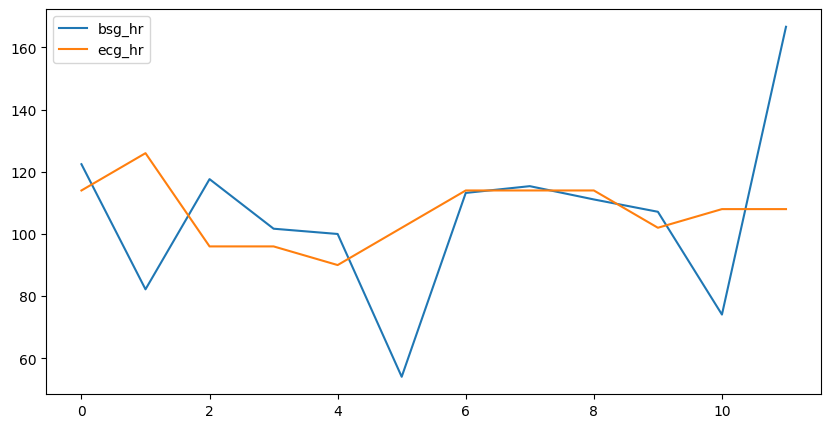

In [1]:
import numpy as np
from scipy.signal import resample
import neurokit2 as nk
import matplotlib.pyplot as plt
from BCG_preprocessing import signal_quality_assessment_v4

def test_match_shift(bsg_long, ecg_long):
    bsg_hr = []
    ecg_hr = []
    for i in range(0, len(bsg_long), 1000):
        bsg_short = bsg_long[i:i+1000]
        ecg_short = ecg_long[i:i+1000]
        res = signal_quality_assessment_v4(x = bsg_short, Fs = 100,
                                        n_lag = len(bsg_short)//2,
                                        low = 1, high = 20,
                                        acf_low = int(0.25 * 100),
                                        acf_high = int(1.2 * 100),
                                        f_low = 0.6)
        if not res[0]:
            res = signal_quality_assessment_v4(x = bsg_short, Fs = 100,
                                            n_lag = len(bsg_short)//2,
                                            low = 1, high = 10,
                                            acf_low = int(0.25 * 100),
                                            acf_high = int(1.2 * 100),
                                            f_low = 0.6, diff = 0)
        if res[0]:
            bsg_hr.append(res[-1])
            _, info = nk.ecg_process(ecg_short, sampling_rate=100)
            r_peaks = info["ECG_R_Peaks"]
            avg_hr = len(r_peaks) * 6
            ecg_hr.append(avg_hr)
    # print(len(bsg_hr), len(ecg_hr))
    return np.array(bsg_hr), np.array(ecg_hr)


data_104 = np.load('BSG_ECG.npy')
print(data_104.shape)
bsg_10s = data_104[:, :1000]

# for i in range(bsg_10s.shape[0]):
#     res = signal_quality_assessment_v4(x = bsg_10s[i], Fs = 100,
#                                         n_lag = len(bsg_10s[i])//2,
#                                         low = 1, high = 20,
#                                         acf_low = int(0.25 * 100),
#                                         acf_high = int(1.2 * 100),
#                                         f_low = 0.6)
#     if not res[0]:
#         res = signal_quality_assessment_v4(x = bsg_10s[i], Fs = 100,
#                                         n_lag = len(bsg_10s[i])//2,
#                                         low = 1, high = 10,
#                                         acf_low = int(0.25 * 100),
#                                         acf_high = int(1.2 * 100),
#                                         f_low = 0.6, diff = 0)
#     if res[0]:
#         print(i)

ecg_10s = data_104[:, 1000:3560]
ecg_10s_new = []
for i in range(ecg_10s.shape[0]):
    ecg_10s_new.append(resample(ecg_10s[i], 1000))
ecg_10s = np.array(ecg_10s_new)

# index = np.random.randint(0, data_104.shape[0] - 60)
bsg_hr_total = []
ecg_hr_total = []
for i in range(0, data_104.shape[0], 60):
    bsg_10min = bsg_10s[i:i+60]
    ecg_10min = ecg_10s[i:i+60]
    bsg_10min = bsg_10min.flatten()
    ecg_10min = ecg_10min.flatten()
    bsg_hr, ecg_hr = test_match_shift(bsg_10min, ecg_10min)
    bsg_hr_total.append(bsg_hr.reshape(-1, 1))
    ecg_hr_total.append(ecg_hr.reshape(-1, 1))

bsg_hr_total = np.vstack(bsg_hr_total).flatten()
ecg_hr_total = np.vstack(ecg_hr_total).flatten()
print(bsg_hr_total.shape, ecg_hr_total.shape)
plt.figure(figsize=(10, 5))
plt.plot(bsg_hr_total, label='bsg_hr')
plt.plot(ecg_hr_total, label='ecg_hr')
plt.legend()
plt.show()

In [6]:
import numpy as np

file_path = "./data/ID_104_10s_BSG_ECG_II_Labels.npy"
data = np.load(file_path)
data = data[:1000]
np.save('./BSG_ECG.npy', data)

size_in_bytes = data.nbytes  # 计算数组的字节大小
print(f"Array size in memory: {size_in_bytes / (1024**2):.2f} MB")

Array size in memory: 27.58 MB
